<b>Problem Statemnt<b>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.

<b>Business Goal<b>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [92]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [93]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Reading and Understanding the data

In [94]:
##Read the dataset

df = pd.read_csv('train.csv')

In [95]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df.shape

(1460, 81)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<b>Percentage of null values in the dataset<b>

In [99]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## Data Cleaning

### Missing Values

<b> Imputing categorical features where NA have a meaning in data dictionary<b>

In [100]:
null_has_meaning = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                   'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
                   'GarageQual','GarageCond','PoolQC',"Fence","MiscFeature","MasVnrType"]

In [101]:
df[null_has_meaning].isnull().sum()

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
MasVnrType         8
dtype: int64

In [102]:
for i in null_has_meaning:
    df[i].fillna("None", inplace=True)

In [103]:
df[null_has_meaning].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
MasVnrType      0
dtype: int64

Checking percentage of null values after imputing the null values with none in categorical variables

In [104]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


There are 5 features which have null values, Analysing and imputing them

#### LotFrontage

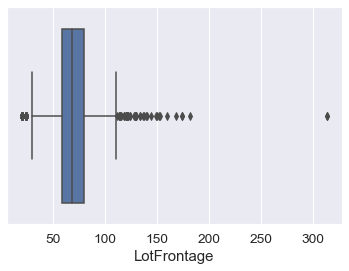

In [105]:
sns.boxplot(df['LotFrontage'])
plt.show()

We can observe that there are outliers in the data set. Hence imputing with median values

In [106]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

#### GarageYrBlt

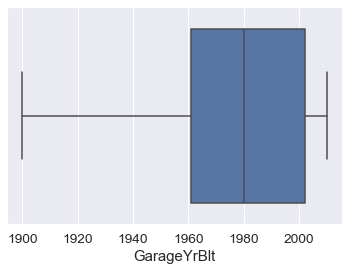

In [107]:
sns.boxplot(df['GarageYrBlt'])
plt.show()

We see that there are no outliers in the dataset, hence iputing with mean values

In [108]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

#### MasVnrArea 

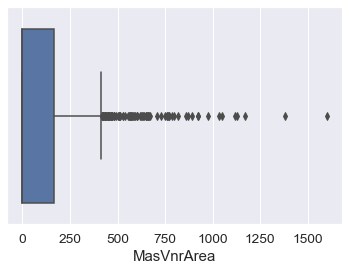

In [109]:
sns.boxplot(df['MasVnrArea'])
plt.show()

In [110]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

#### dropping row Electrical is null as its only one row

In [111]:
df.dropna()
df.shape


(1460, 81)

we can observe that 9 rows have been deleted and there should be no null values in the datset now

In [112]:
df.isnull().sum().sort_values(ascending=False)

Electrical       1
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
Id               0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageCars       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

### Duplicates

In [113]:
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicate entries in the data

### Outliers

In [114]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

from this we can observe that there are outliers present in many columns. We will drop extreme outlier values

In [115]:
types_train = df.dtypes
num_cols = types_train[(types_train=='int64') | (types_train=='float64')]
numerical_list = list(num_cols.index)
numerical_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [116]:
##Considering Q1 as .25 and Q3 as .99 for dropping outliers with extreme values

def drop_outliers(x):
    for col in numerical_list:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [117]:
df.shape

(1439, 81)

In [118]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.0,1439.000000,1439.000000,1439.000000,1439.000000
mean,729.594163,56.820709,69.314802,10012.879083,6.093120,5.570535,1971.319666,1984.800556,102.917999,436.176511,45.569145,569.743572,1051.489229,1156.656706,344.660181,5.657401,1506.974288,0.419041,0.056984,1.560111,0.384295,2.860320,1.045865,6.503127,0.603197,1978.598323,1.768589,472.428770,93.348853,46.618485,21.790132,3.106324,14.858235,0.0,17.021543,6.330090,2007.815844,180069.997220
std,421.521366,42.196554,19.779423,5447.945811,1.379747,1.110260,30.302795,20.690375,180.173885,432.442487,160.357387,442.539219,416.300011,373.056237,432.924127,47.901180,505.966911,0.510201,0.237815,0.548452,0.502072,0.814901,0.219008,1.608335,0.636415,24.025457,0.747709,212.358945,123.829583,66.070355,59.814750,26.358008,54.858125,0.0,108.983769,2.707611,1.328043,78085.402541
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,366.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,226.000000,795.000000,881.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,129900.000000
50%,730.000000,50.000000,69.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,378.000000,0.000000,482.000000,990.000000,1080.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,162000.000000
75%,1093.500000,70.000000,79.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,164.500000,706.000000,0.000000,811.000000,1287.000000,1383.000000,728.000000,0.000000,1769.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,213125.000000
90%,1313.200000,120.000000,92.000000,14178.200000,8.000000,7.000000,2006.000000,2006.000000,329.000000,1056.600000,105.200000,1232.400000,1600.400000,1675.800000,940.200000,0.000000,2143.400000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,756.200000,260.200000,130.000000,112.000000,0.000000,0.000000,0.0,0.000000,10.000000,2010.000000,277600.000000
95%,1385.100000,160.000000,103.000000,16740.300000,8.000000,8.000000,2007.000000,2007.000000,451.100000,1261.900000,391.500000,1468.200000,1746.600000,1812.500000,1129.500000,0.000000,2450.200000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.200000,328.500000,174.100000,180.300000,0.000000,160.000000,0.0,0.000000,11.000000,2010.000000,325661.600000
99%,1444.620000,190.000000,130.000000,32590.100000,

### Year Columns

There are four year columns present in the dataset - YearBuilt, YearRemodAdd , GarageYrBlt and YrSold.

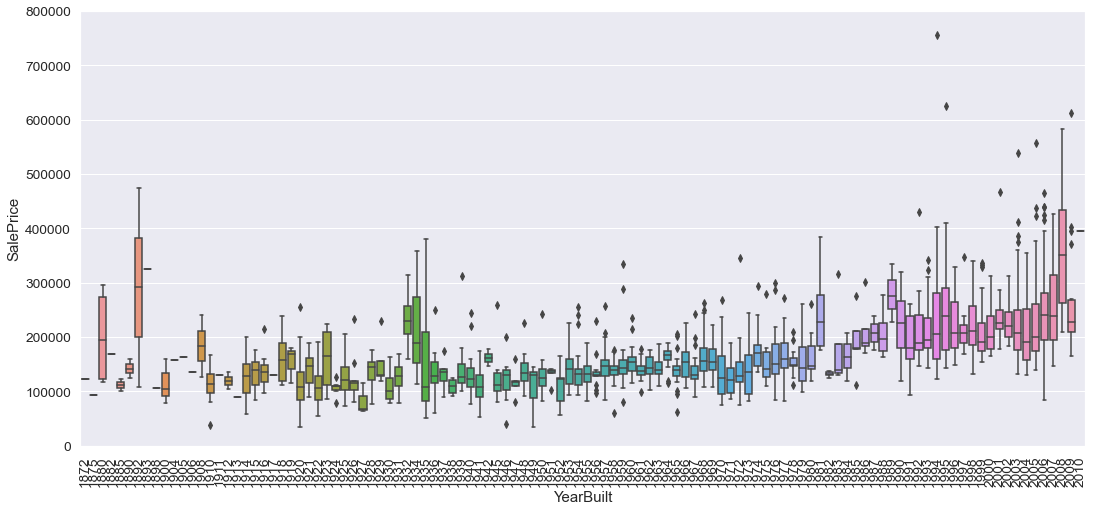

In [119]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(18,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

Creating a column to identify if house has been remodelled or not

In [120]:
##YearBuilt: Original construction date

##YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1
 
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0


Create a new column to determine the age of the building at the time of selling

In [121]:
def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['SellAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,SellAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,6
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,8


Create a new column to identify if the garage was newly built or not

In [122]:
df['GarageYrBlt'].min()

1900.0

In [123]:
df['GarageYrBlt'].max()

2010.0

In [124]:
df['GarageYrBlt'].quantile(.75)

2001.0

In [125]:
### If garage construction year >=2001 its new garage else old garage

def getGarageConstructionPeriod(row):
    if row < 2001:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,SellAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,8,0


#### Lets drop the year columns now as we have create new columns

In [126]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1439 non-null   int64  
 1   MSSubClass      1439 non-null   int64  
 2   MSZoning        1439 non-null   object 
 3   LotFrontage     1439 non-null   float64
 4   LotArea         1439 non-null   int64  
 5   Street          1439 non-null   object 
 6   Alley           1439 non-null   object 
 7   LotShape        1439 non-null   object 
 8   LandContour     1439 non-null   object 
 9   Utilities       1439 non-null   object 
 10  LotConfig       1439 non-null   object 
 11  LandSlope       1439 non-null   object 
 12  Neighborhood    1439 non-null   object 
 13  Condition1      1439 non-null   object 
 14  Condition2      1439 non-null   object 
 15  BldgType        1439 non-null   object 
 16  HouseStyle      1439 non-null   object 
 17  OverallQual     1439 non-null   i

## Data Visualization

#### Categorical Columns

In [128]:
types_train = df.dtypes
cat_cols = types_train[(types_train=='object')]
categorical_list = list(cat_cols.index)
categorical_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Lets create boxplots to understand the categorical variables. I am plotting 15 variables at a time in for loop

MSZoning
-----------------------Value Counts--------------------------
RL         1131
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-------------------------------------------------------------


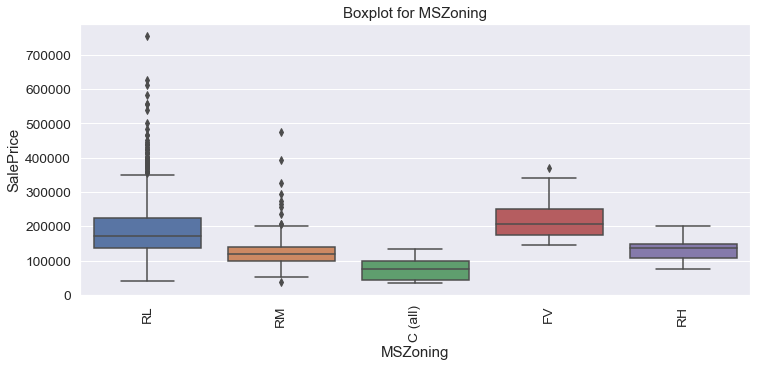

Street
-----------------------Value Counts--------------------------
Pave    1434
Grvl       5
Name: Street, dtype: int64
-------------------------------------------------------------


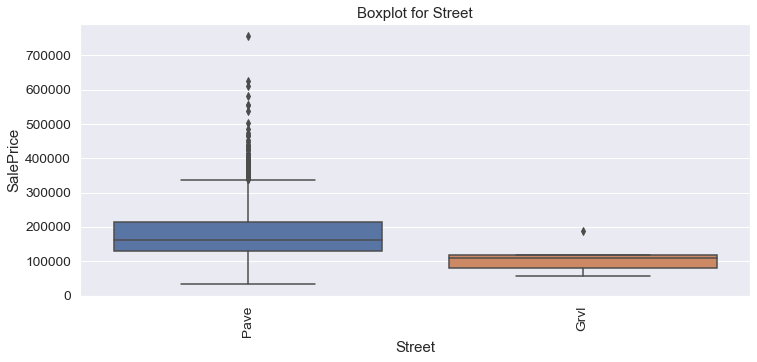

Alley
-----------------------Value Counts--------------------------
None    1348
Grvl      50
Pave      41
Name: Alley, dtype: int64
-------------------------------------------------------------


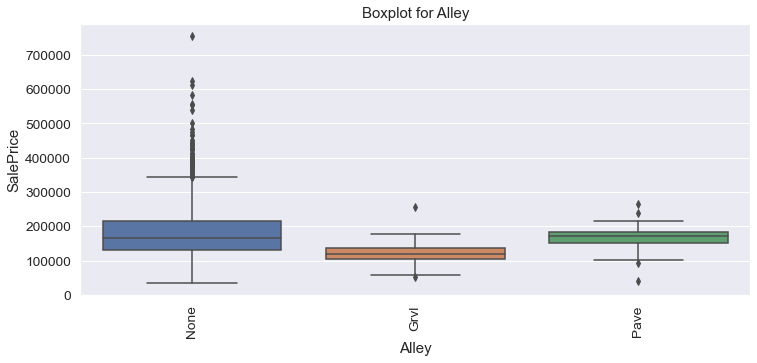

LotShape
-----------------------Value Counts--------------------------
Reg    915
IR1    478
IR2     38
IR3      8
Name: LotShape, dtype: int64
-------------------------------------------------------------


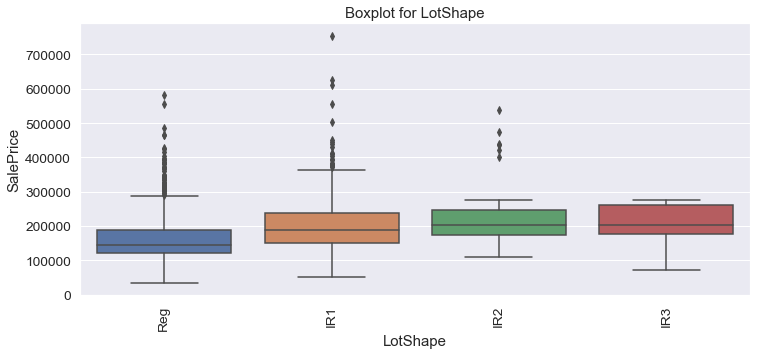

LandContour
-----------------------Value Counts--------------------------
Lvl    1296
Bnk      62
HLS      48
Low      33
Name: LandContour, dtype: int64
-------------------------------------------------------------


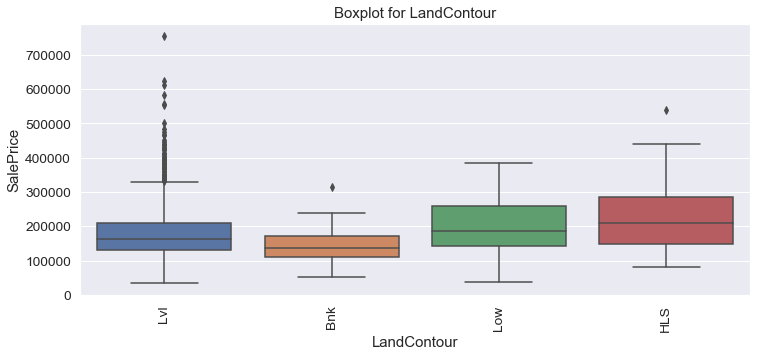

Utilities
-----------------------Value Counts--------------------------
AllPub    1438
NoSeWa       1
Name: Utilities, dtype: int64
-------------------------------------------------------------


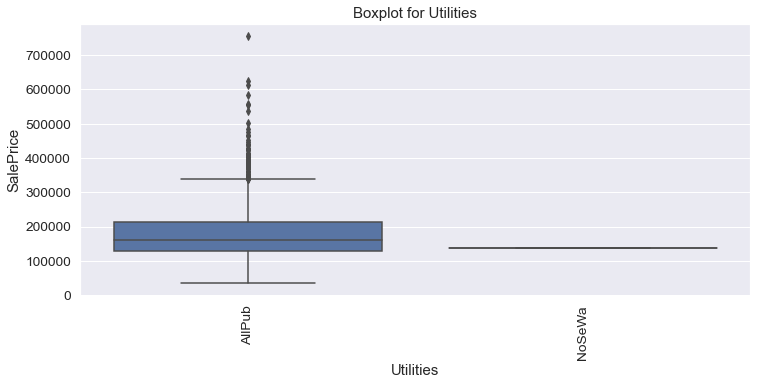

LotConfig
-----------------------Value Counts--------------------------
Inside     1041
Corner      257
CulDSac      90
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-------------------------------------------------------------


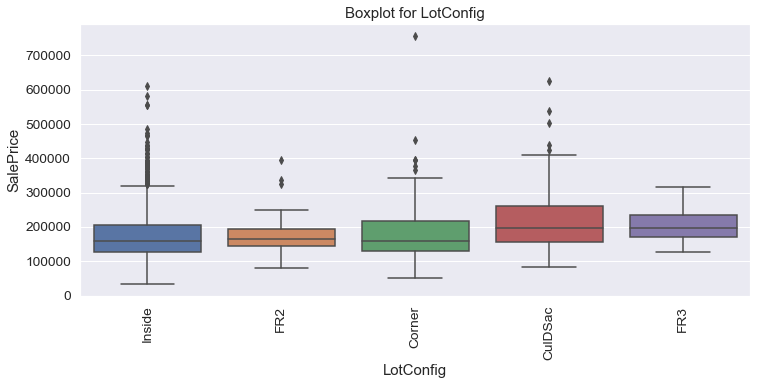

LandSlope
-----------------------Value Counts--------------------------
Gtl    1366
Mod      64
Sev       9
Name: LandSlope, dtype: int64
-------------------------------------------------------------


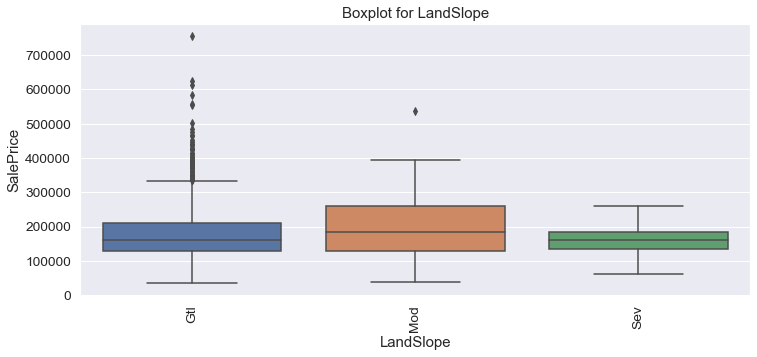

Neighborhood
-----------------------Value Counts--------------------------
NAmes      220
CollgCr    149
OldTown    113
Edwards     97
Somerst     86
Gilbert     78
NridgHt     77
Sawyer      73
NWAmes      71
SawyerW     59
BrkSide     58
Crawfor     50
Mitchel     48
NoRidge     40
Timber      36
IDOTRR      36
ClearCr     26
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
-------------------------------------------------------------


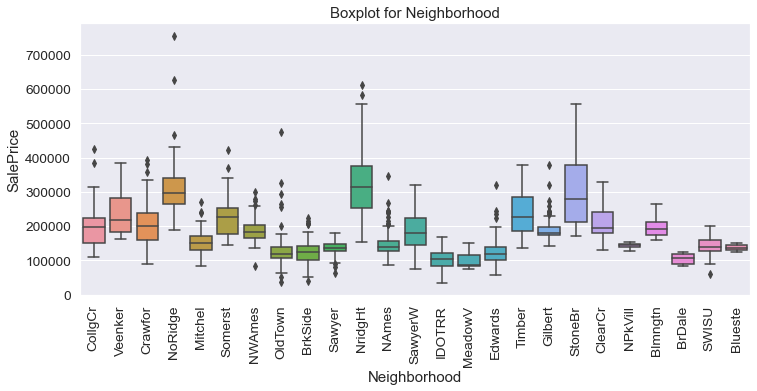

Condition1
-----------------------Value Counts--------------------------
Norm      1245
Feedr       79
Artery      46
RRAn        25
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
-------------------------------------------------------------


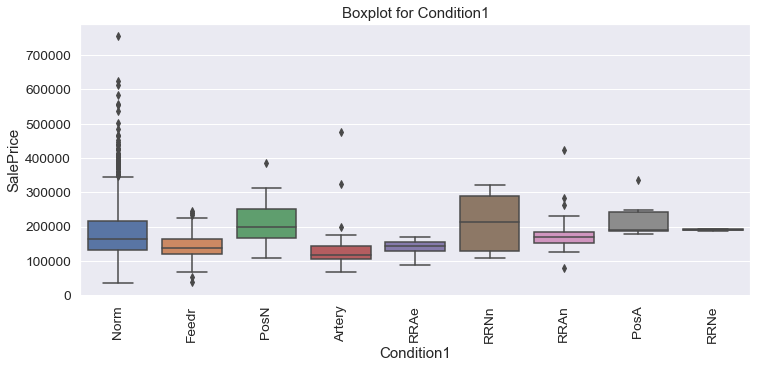

Condition2
-----------------------Value Counts--------------------------
Norm      1425
Feedr        6
RRNn         2
Artery       2
PosN         2
PosA         1
RRAn         1
Name: Condition2, dtype: int64
-------------------------------------------------------------


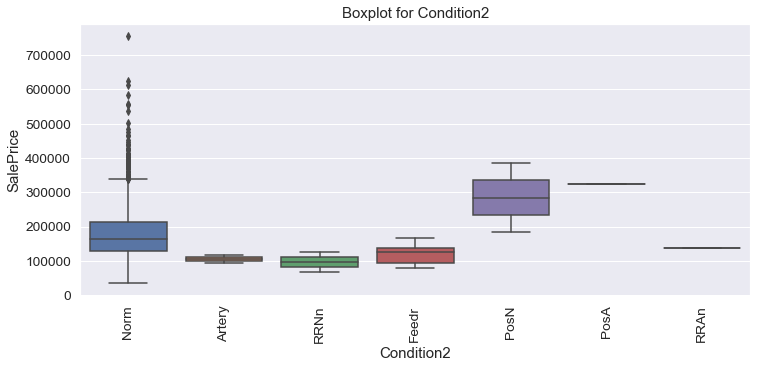

BldgType
-----------------------Value Counts--------------------------
1Fam      1203
TwnhsE     114
Duplex      50
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64
-------------------------------------------------------------


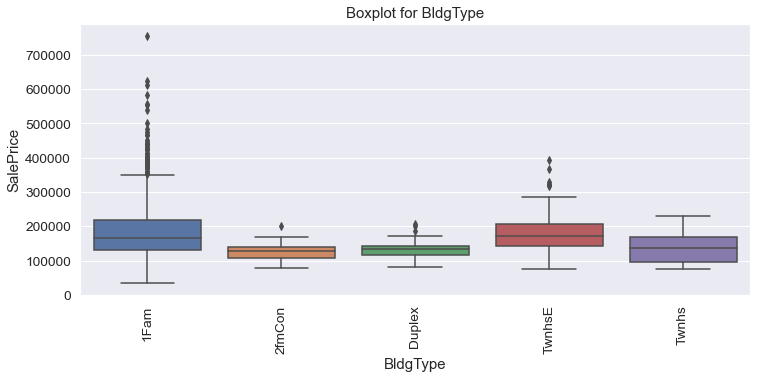

HouseStyle
-----------------------Value Counts--------------------------
1Story    717
2Story    439
1.5Fin    150
SLvl       63
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
-------------------------------------------------------------


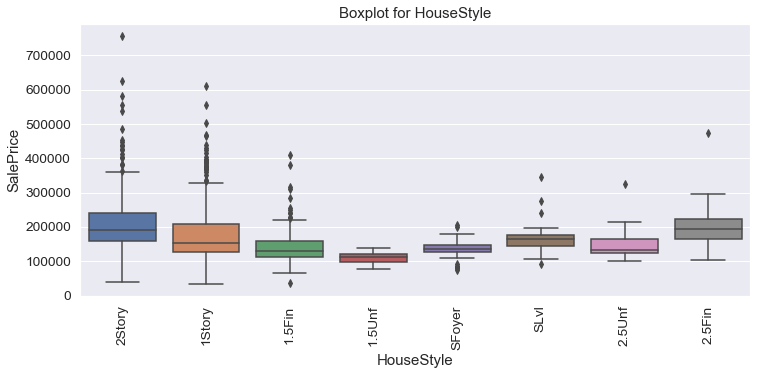

RoofStyle
-----------------------Value Counts--------------------------
Gable      1130
Hip         279
Flat         11
Gambrel      11
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64
-------------------------------------------------------------


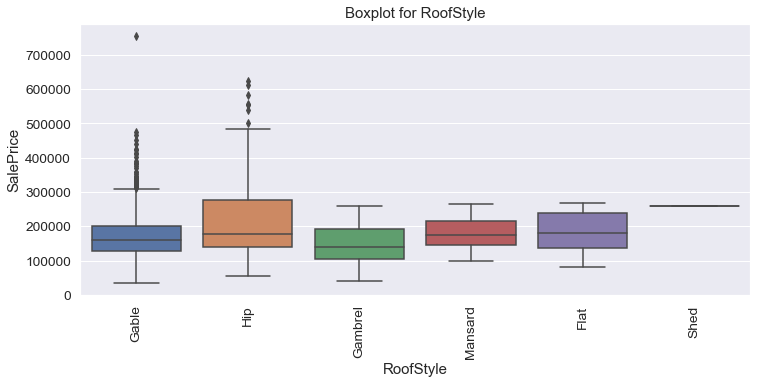

RoofMatl
-----------------------Value Counts--------------------------
CompShg    1416
Tar&Grv       9
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
-------------------------------------------------------------


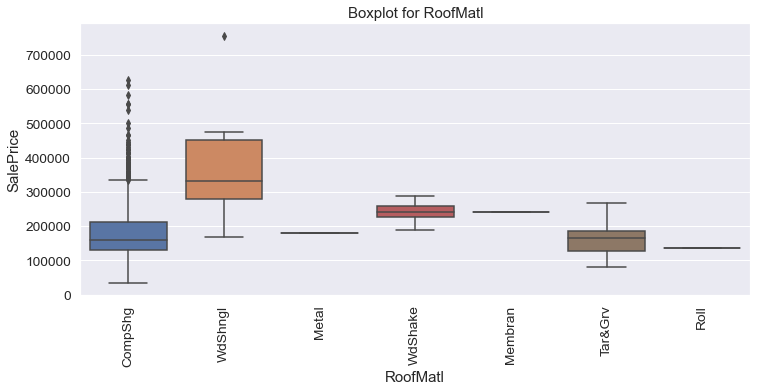

In [129]:
for i in range(0,15):
    plt.figure(figsize=(12,5))
    print(categorical_list[i])
    print("-----------------------Value Counts--------------------------")
    print(df[categorical_list[i]].value_counts())
    print("-------------------------------------------------------------")
    plt.title("Boxplot for " + categorical_list[i])
    sns.boxplot(x=df[categorical_list[i]], y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.show();

<b>There is not much variance in Street and Utilities hence dropping them
    
House of Price with roof material Wood Shingles is more compared to other materials
    
Gravel Type of alley access to property sells at a lower price
    
<b>
    


In [130]:
df.drop(['Street','Utilities'], axis = 1, inplace = True)

Exterior1st
-----------------------Value Counts--------------------------
VinylSd    513
HdBoard    220
MetalSd    218
Wd Sdng    202
Plywood    101
CemntBd     60
BrkFace     49
WdShing     26
Stucco      23
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
-------------------------------------------------------------


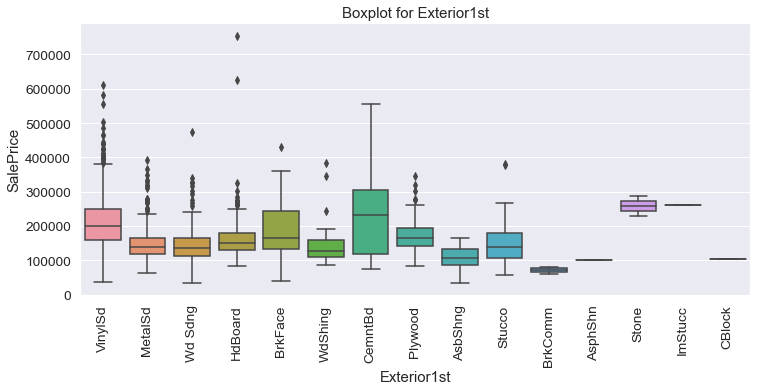

Exterior2nd
-----------------------Value Counts--------------------------
VinylSd    503
MetalSd    212
HdBoard    204
Wd Sdng    195
Plywood    135
CmentBd     59
Wd Shng     37
BrkFace     24
Stucco      24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
-------------------------------------------------------------


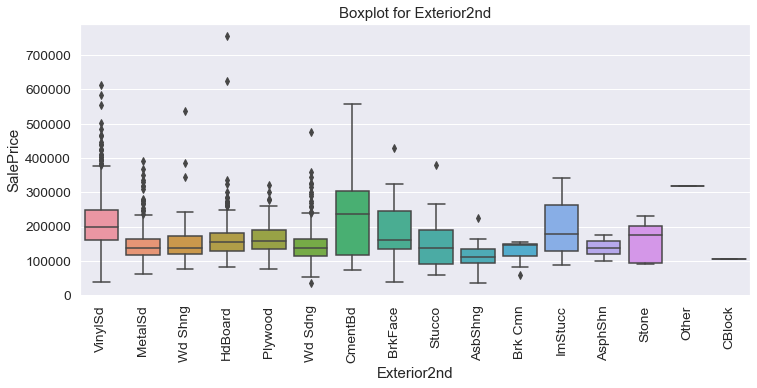

MasVnrType
-----------------------Value Counts--------------------------
None       858
BrkFace    442
Stone      126
BrkCmn      13
Name: MasVnrType, dtype: int64
-------------------------------------------------------------


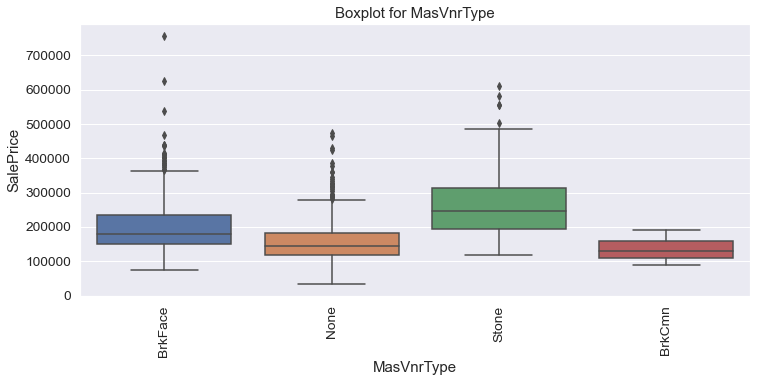

ExterQual
-----------------------Value Counts--------------------------
TA    894
Gd    482
Ex     50
Fa     13
Name: ExterQual, dtype: int64
-------------------------------------------------------------


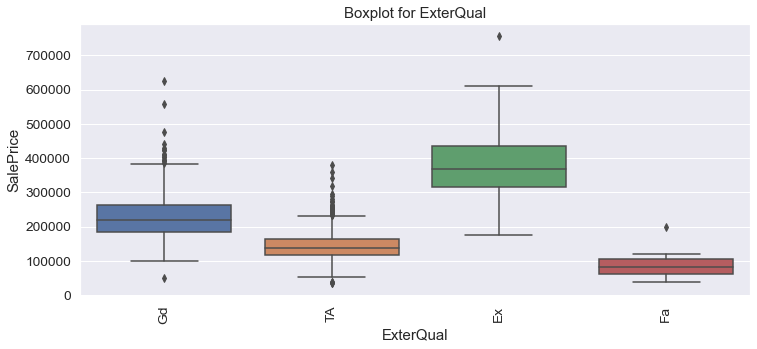

ExterCond
-----------------------Value Counts--------------------------
TA    1267
Gd     141
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64
-------------------------------------------------------------


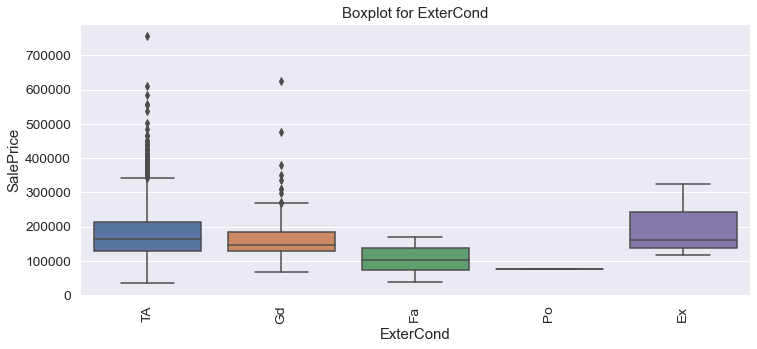

Foundation
-----------------------Value Counts--------------------------
PConc     642
CBlock    620
BrkTil    146
Slab       23
Stone       5
Wood        3
Name: Foundation, dtype: int64
-------------------------------------------------------------


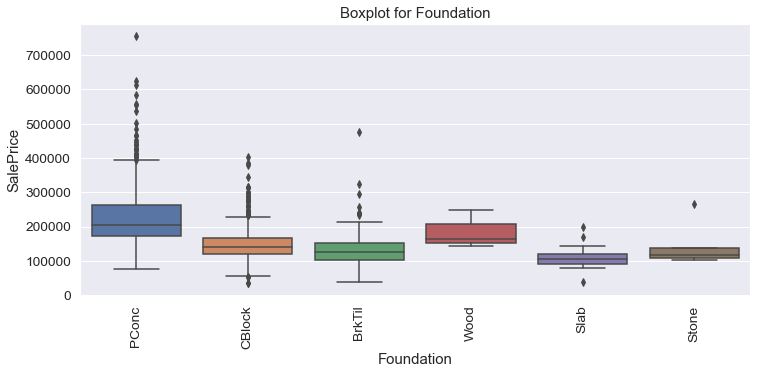

BsmtQual
-----------------------Value Counts--------------------------
TA      641
Gd      608
Ex      119
None     36
Fa       35
Name: BsmtQual, dtype: int64
-------------------------------------------------------------


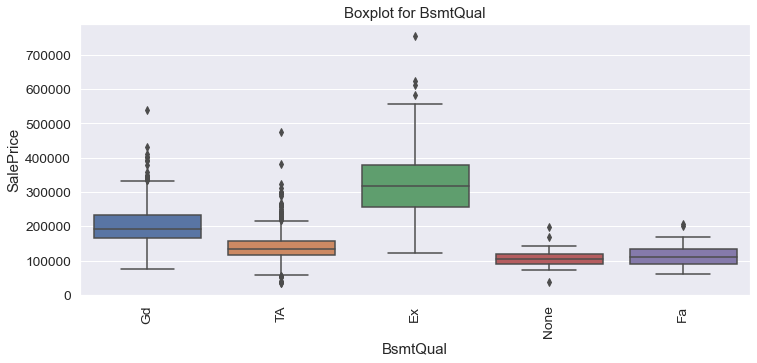

BsmtCond
-----------------------Value Counts--------------------------
TA      1293
Gd        63
Fa        45
None      36
Po         2
Name: BsmtCond, dtype: int64
-------------------------------------------------------------


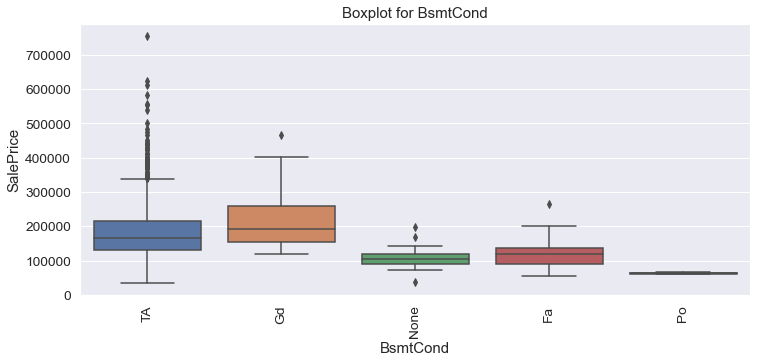

BsmtExposure
-----------------------Value Counts--------------------------
No      946
Av      217
Gd      127
Mn      112
None     37
Name: BsmtExposure, dtype: int64
-------------------------------------------------------------


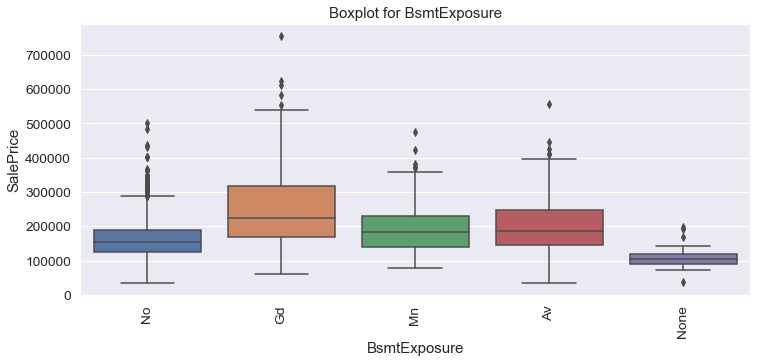

BsmtFinType1
-----------------------Value Counts--------------------------
Unf     427
GLQ     409
ALQ     216
BLQ     145
Rec     132
LwQ      74
None     36
Name: BsmtFinType1, dtype: int64
-------------------------------------------------------------


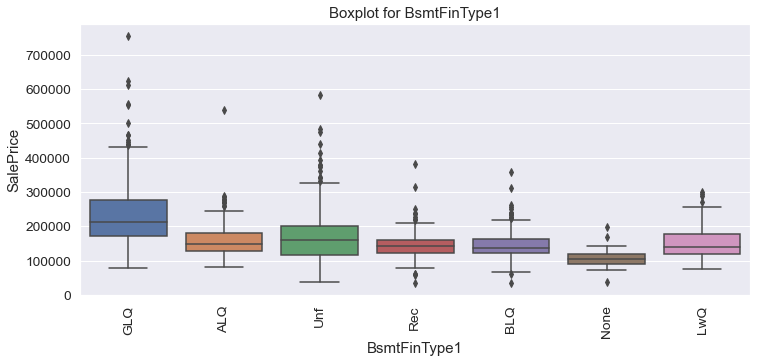

BsmtFinType2
-----------------------Value Counts--------------------------
Unf     1243
Rec       51
LwQ       43
None      37
BLQ       32
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
-------------------------------------------------------------


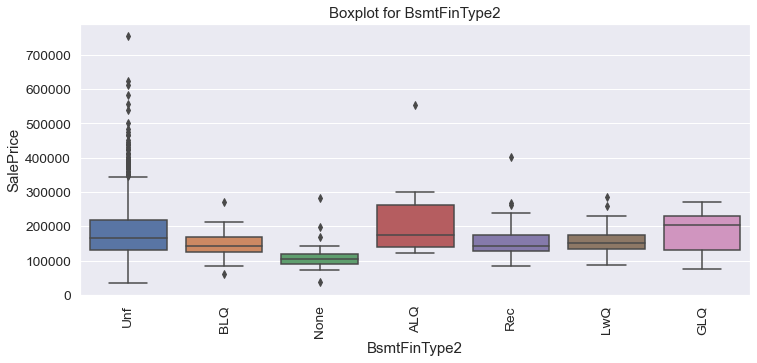

Heating
-----------------------Value Counts--------------------------
GasA     1408
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
-------------------------------------------------------------


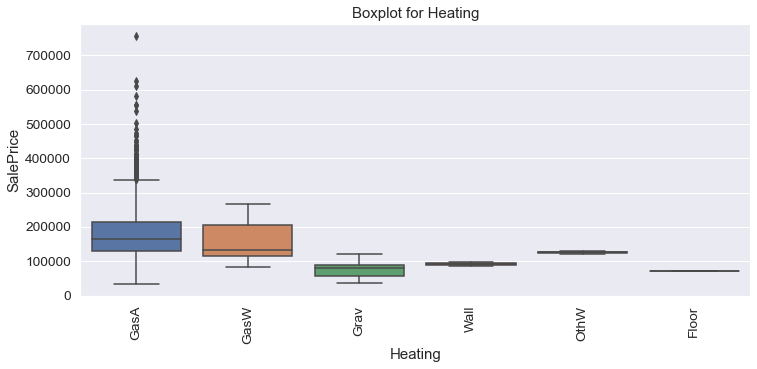

HeatingQC
-----------------------Value Counts--------------------------
Ex    731
TA    421
Gd    239
Fa     47
Po      1
Name: HeatingQC, dtype: int64
-------------------------------------------------------------


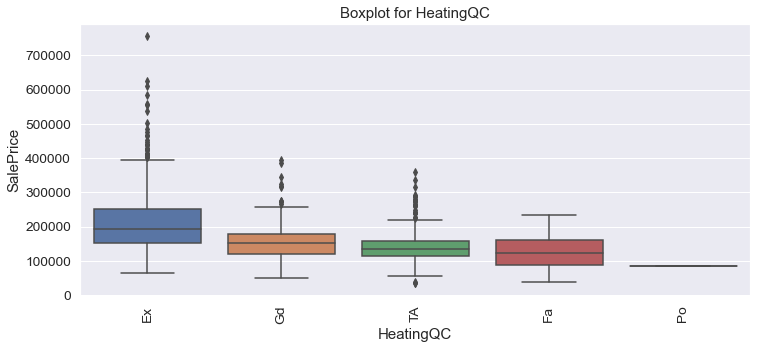

CentralAir
-----------------------Value Counts--------------------------
Y    1345
N      94
Name: CentralAir, dtype: int64
-------------------------------------------------------------


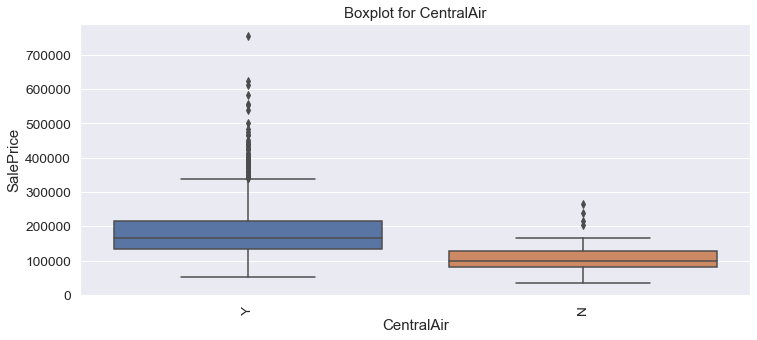

Electrical
-----------------------Value Counts--------------------------
SBrkr    1313
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
-------------------------------------------------------------


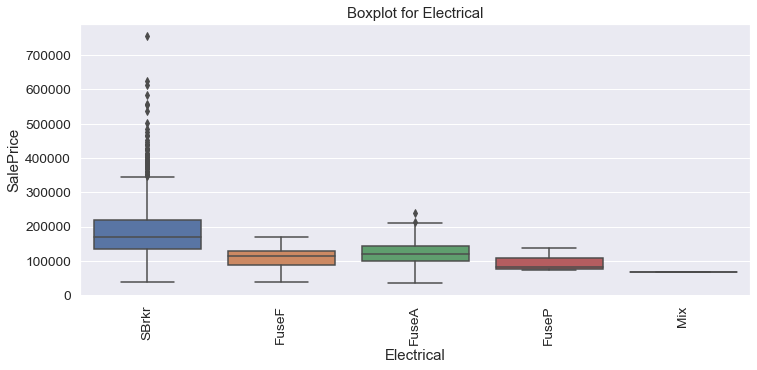

In [131]:
for i in range(15,30):
    plt.figure(figsize=(12,5))
    print(categorical_list[i])
    print("-----------------------Value Counts--------------------------")
    print(df[categorical_list[i]].value_counts())
    print("-------------------------------------------------------------")
    plt.title("Boxplot for " + categorical_list[i])
    sns.boxplot(x=df[categorical_list[i]], y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.show();

<b> Houses with Masonry veneer type - Stone sells at a higher price
    
 Houses with Central air conditioning sell at a higher price
    
 Houses with Electrical System Standard Circuit Breakers & Romex sells at higher price
<b>

KitchenQual
-----------------------Value Counts--------------------------
TA    726
Gd    577
Ex     98
Fa     38
Name: KitchenQual, dtype: int64
-------------------------------------------------------------


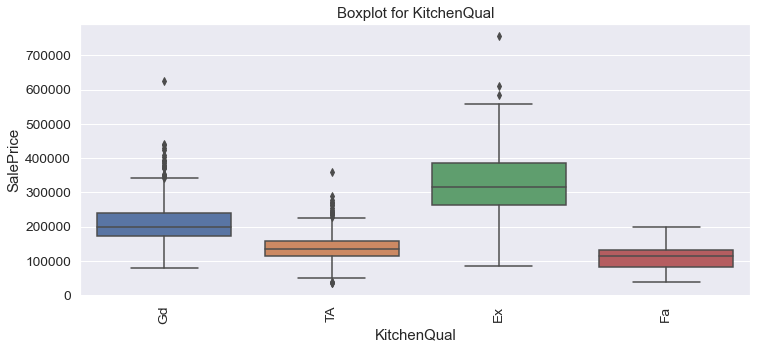

Functional
-----------------------Value Counts--------------------------
Typ     1341
Min2      34
Min1      30
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64
-------------------------------------------------------------


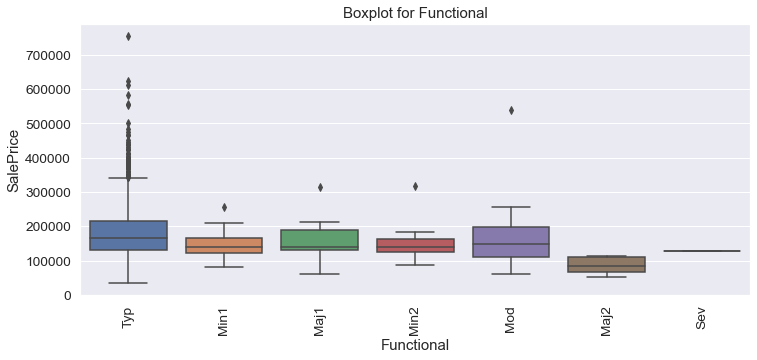

FireplaceQu
-----------------------Value Counts--------------------------
None    686
Gd      374
TA      306
Fa       32
Ex       23
Po       18
Name: FireplaceQu, dtype: int64
-------------------------------------------------------------


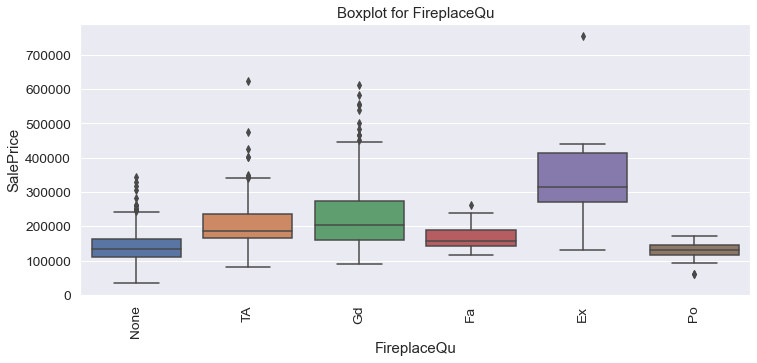

GarageType
-----------------------Value Counts--------------------------
Attchd     855
Detchd     385
BuiltIn     87
None        79
Basment     19
CarPort      8
2Types       6
Name: GarageType, dtype: int64
-------------------------------------------------------------


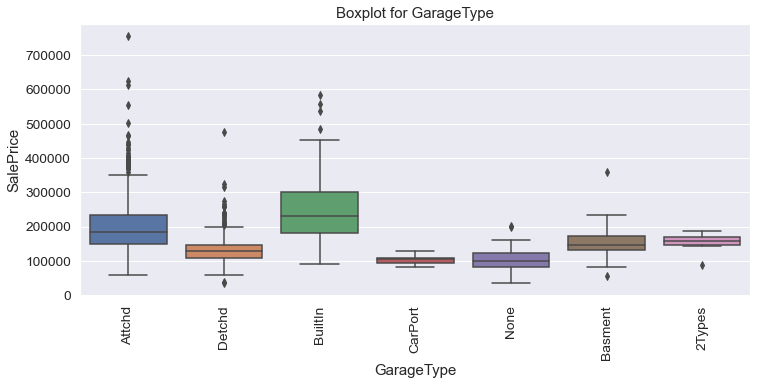

GarageFinish
-----------------------Value Counts--------------------------
Unf     600
RFn     413
Fin     347
None     79
Name: GarageFinish, dtype: int64
-------------------------------------------------------------


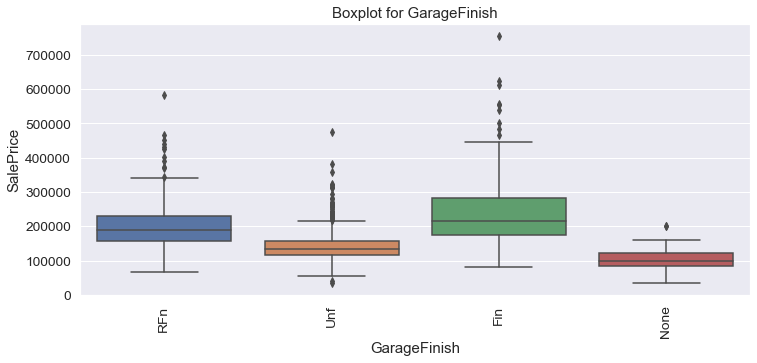

GarageQual
-----------------------Value Counts--------------------------
TA      1293
None      79
Fa        48
Gd        13
Po         3
Ex         3
Name: GarageQual, dtype: int64
-------------------------------------------------------------


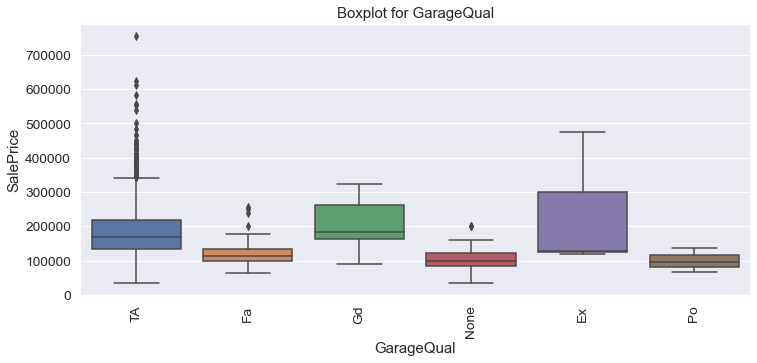

GarageCond
-----------------------Value Counts--------------------------
TA      1308
None      79
Fa        35
Gd         8
Po         7
Ex         2
Name: GarageCond, dtype: int64
-------------------------------------------------------------


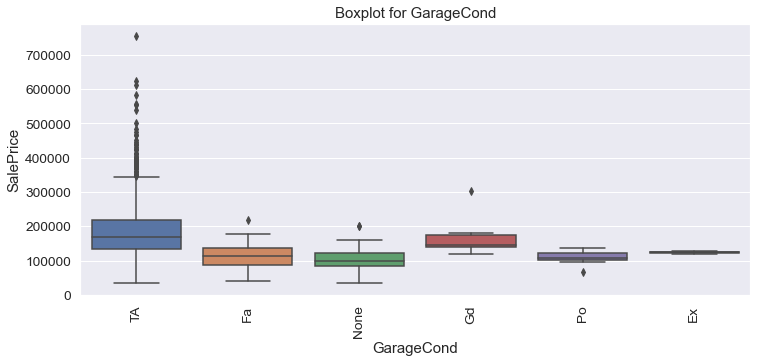

PavedDrive
-----------------------Value Counts--------------------------
Y    1321
N      88
P      30
Name: PavedDrive, dtype: int64
-------------------------------------------------------------


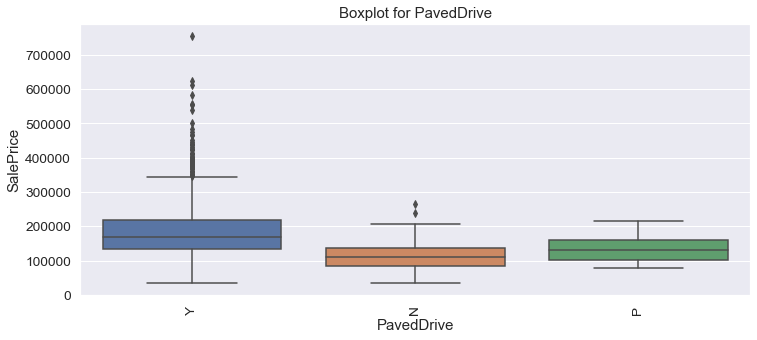

PoolQC
-----------------------Value Counts--------------------------
None    1439
Name: PoolQC, dtype: int64
-------------------------------------------------------------


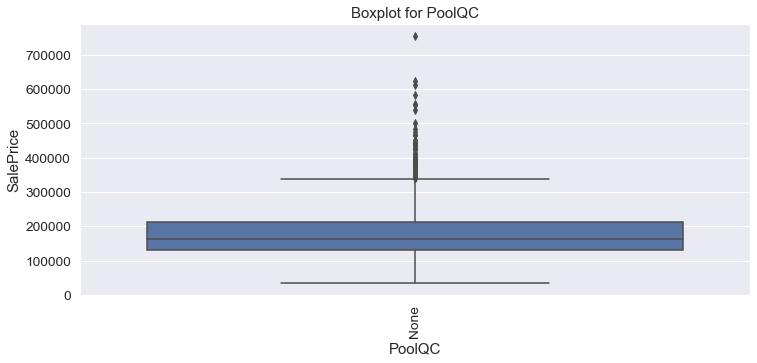

Fence
-----------------------Value Counts--------------------------
None     1167
MnPrv     153
GdPrv      54
GdWo       54
MnWw       11
Name: Fence, dtype: int64
-------------------------------------------------------------


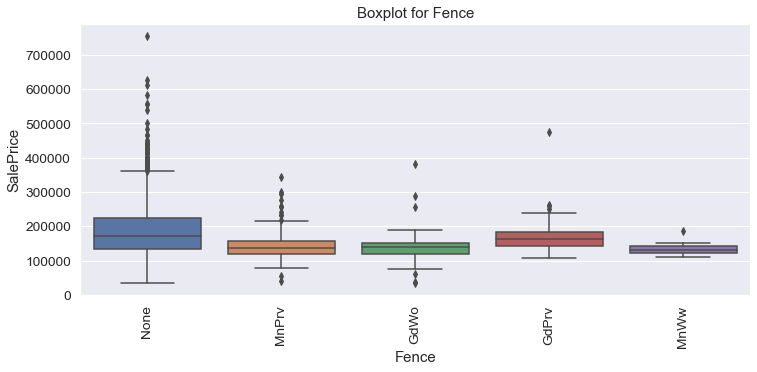

MiscFeature
-----------------------Value Counts--------------------------
None    1395
Shed      43
Othr       1
Name: MiscFeature, dtype: int64
-------------------------------------------------------------


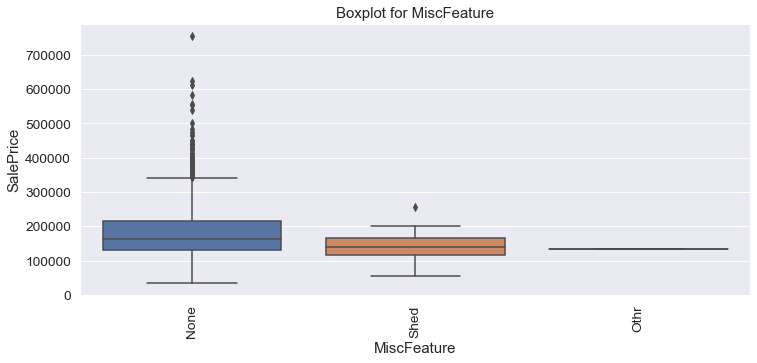

SaleType
-----------------------Value Counts--------------------------
WD       1247
New       121
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
-------------------------------------------------------------


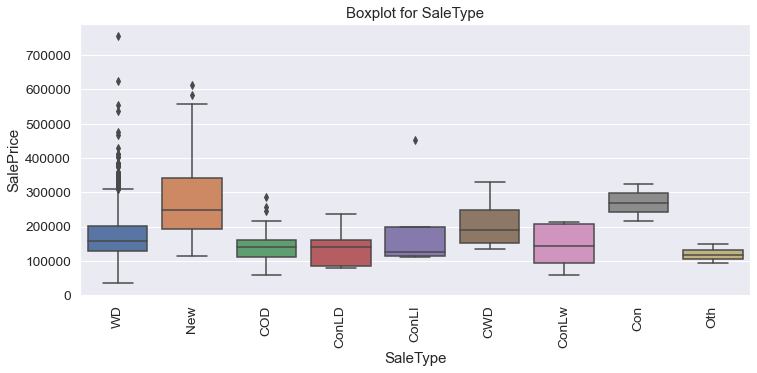

SaleCondition
-----------------------Value Counts--------------------------
Normal     1182
Partial     124
Abnorml      99
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64
-------------------------------------------------------------


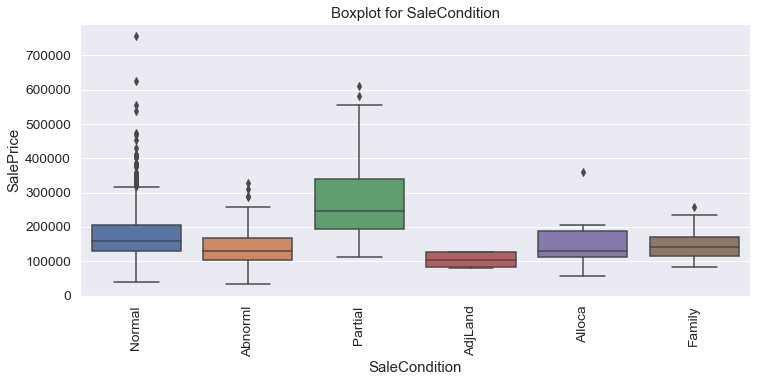

In [132]:
for i in range(30,len(categorical_list)):
    plt.figure(figsize=(12,5))
    print(categorical_list[i])
    print("-----------------------Value Counts--------------------------")
    print(df[categorical_list[i]].value_counts())
    print("-------------------------------------------------------------")
    plt.title("Boxplot for " + categorical_list[i])
    sns.boxplot(x=df[categorical_list[i]], y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.show();

<b> There is not much variance in PoolQC hence dropping the column
    Houses with Excellent Kitchen Quality, Fire Place Quality and Garage Quality sell at a higher price
    
</b>

In [133]:
df.drop(['PoolQC'], axis = 1, inplace = True)

#### Numerical Columns

In [134]:
numerical_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [135]:
df.drop(['Id'], axis = 1, inplace = True)

<Figure size 720x360 with 0 Axes>

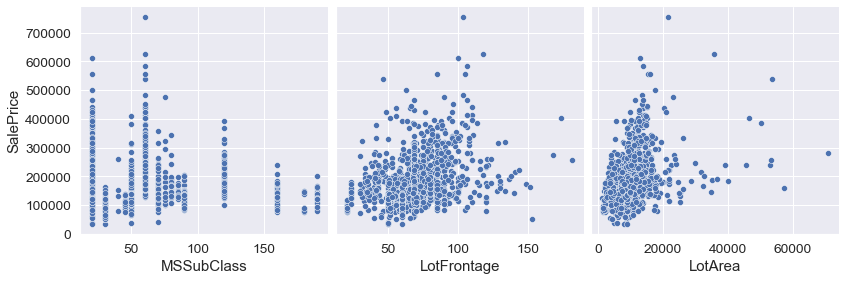

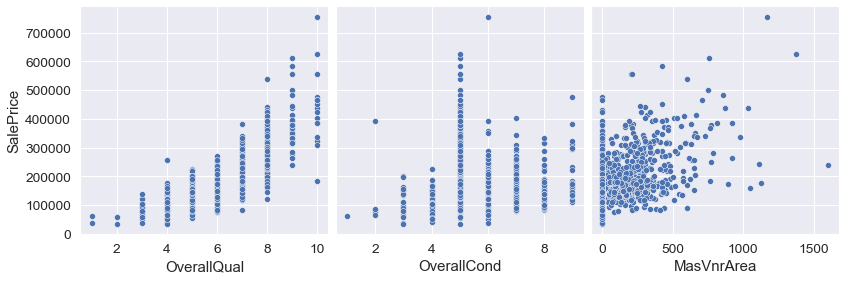

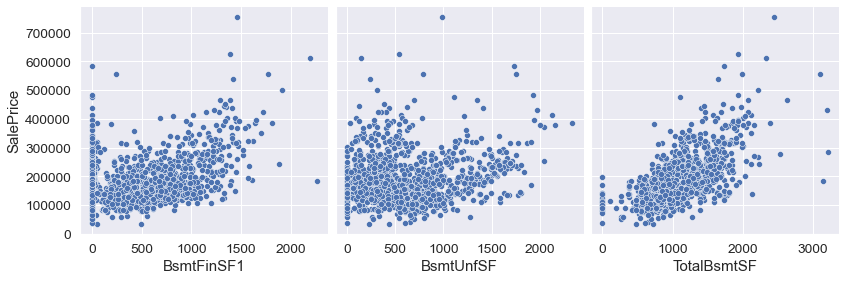

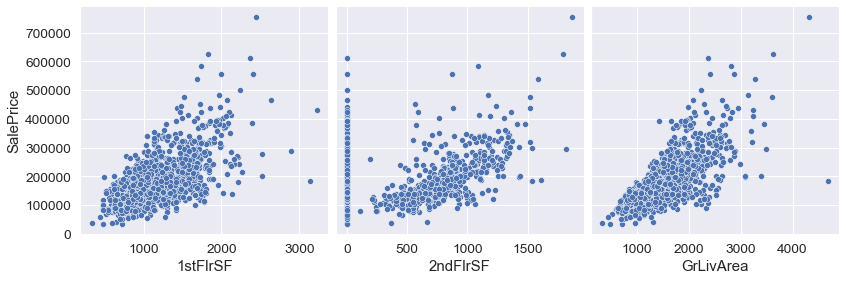

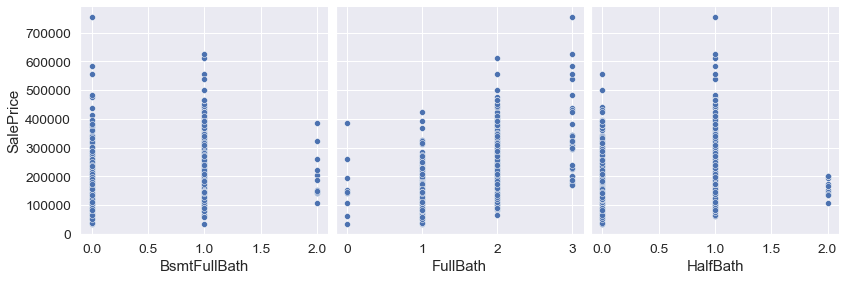

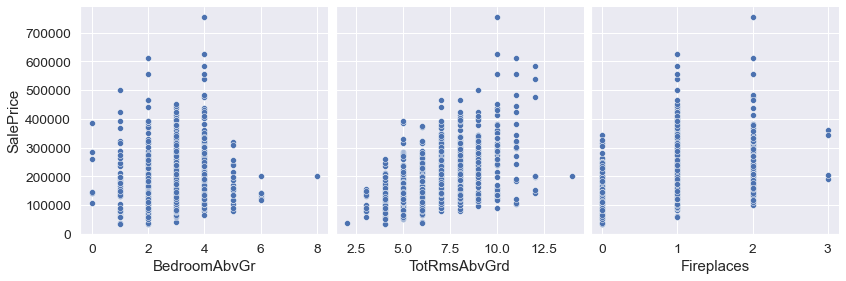

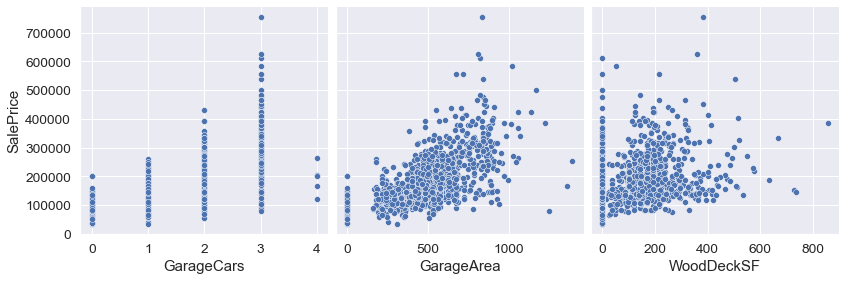

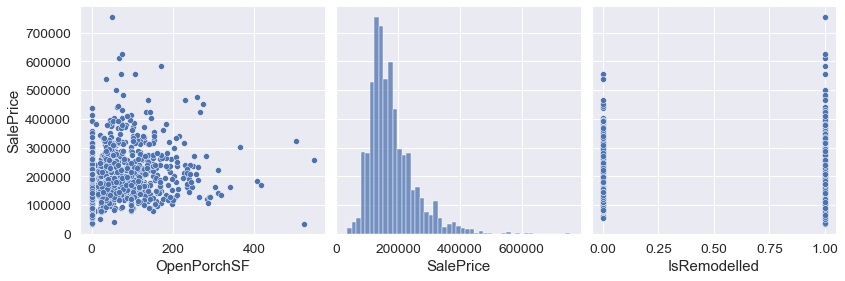

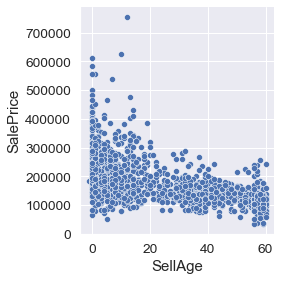

In [136]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4)
sns.pairplot(df, x_vars=['SellAge'], y_vars='SalePrice',height=4)
plt.show()

We can see that there is linear relationship between SalePrice and GrLivArea & SalePrice and 1stFlrSF

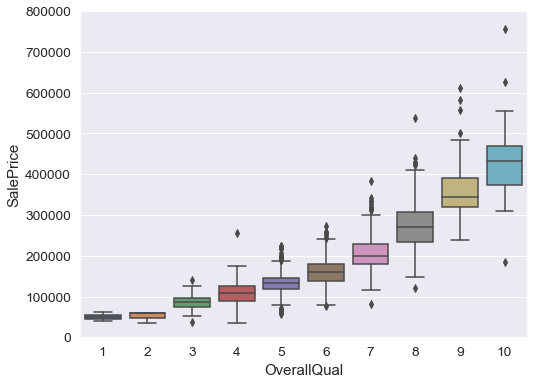

In [137]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

SalesPrice increases based on overall material and finish of the house

### Visualizing the target column - SalePrice

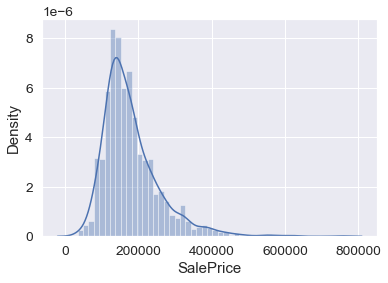

In [138]:
sns.distplot(df['SalePrice'])
plt.show()

In [139]:
df['SalePrice'].skew()

1.7662229754714256

data is highky skewed

In [140]:
df['SalePrice'].kurt()

5.499878697791411

From the above graphs we can see that the target column SalePrice is skewed.

Lets do log transform and check if it becomes normally distributed

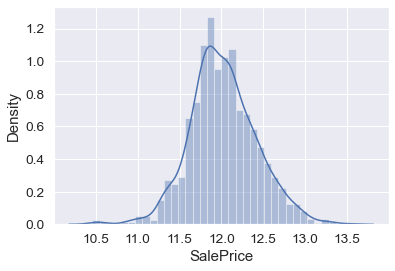

In [141]:
sns.distplot(np.log(df.SalePrice));

We can see that it is normally distributed now. Creating a new column with Transformed Price and dropping SalePrice

In [142]:
df['TransformedPrice'] = np.log(df.SalePrice)

In [143]:
df.drop(['SalePrice'], axis = 1, inplace = True)

In [144]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,IsRemodelled,SellAge,OldOrNewGarage,TransformedPrice
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,WD,Normal,0,5,1,12.247694
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,WD,Normal,0,31,0,12.109011
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,WD,Normal,1,6,1,12.317167
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,WD,Abnorml,1,36,0,11.849398
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,WD,Normal,0,8,0,12.429216


### Correlation Matrix

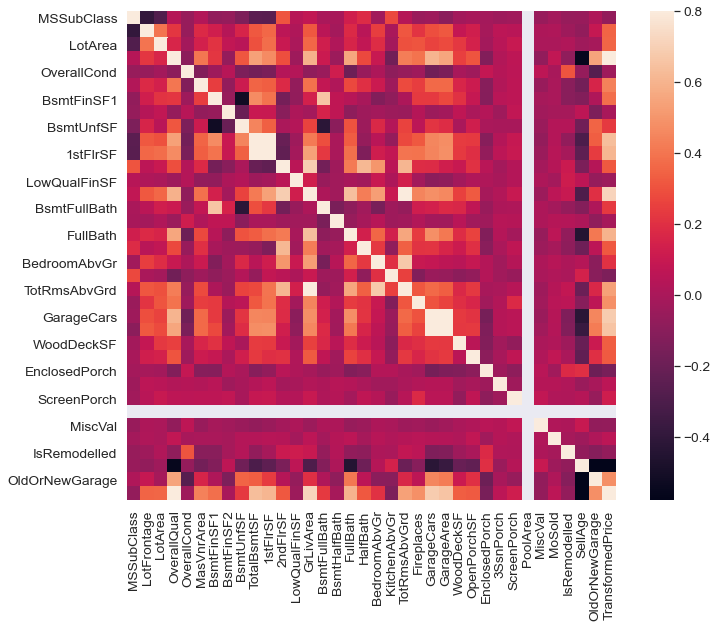

In [145]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

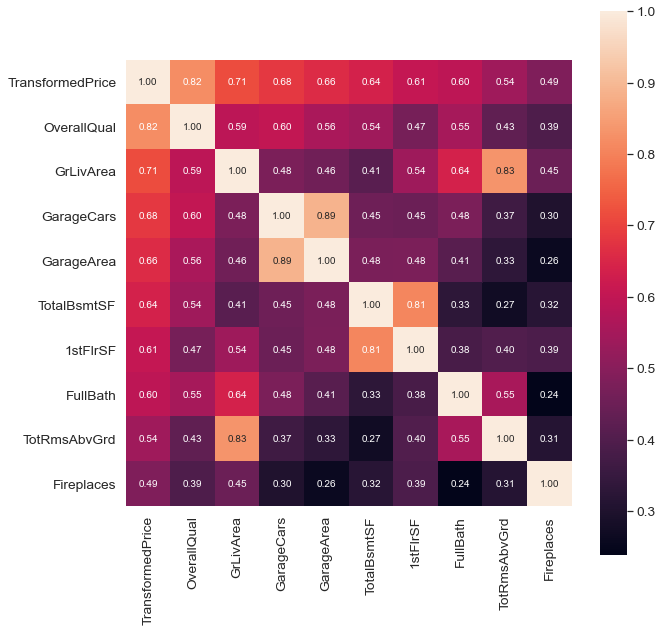

In [146]:
k = 10 # number of variables for a heatmap
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(k,'TransformedPrice')['TransformedPrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

GarageCars and GarageArea are highly correlated with correlation value 0.89, GrLvArea is correlated with TotRmsAbvGrd with correlation value 0.83 and 1stFlrSF is correlated with TotalBsmtSF with value 0.81

Dropping highly correlated columns

In [147]:
df.drop(['TotRmsAbvGrd', 'GarageCars','1stFlrSF'], axis = 1, inplace = True)

## Data Preparation

In [148]:
types_train = df.dtypes
cat_cols = types_train[(types_train=='object')]
categorical_list = list(cat_cols.index)
cat_data = df[categorical_list]

In [149]:
cat_data.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
2,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
3,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,WD,Abnorml
4,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal


#### Below columns have order in them, hence mapping them


In [150]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['GarageFinish'] = df.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Dummies for other categorical columns

In [151]:
types_train = df.dtypes
cat_cols = types_train[(types_train=='object')]
cols = list(cat_cols.index)
cols

['MSZoning',
 'Alley',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [152]:
df_dummies = pd.get_dummies(df[cols], drop_first = True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [153]:
df = pd.concat([df, df_dummies], axis = 1)
df.drop(cols, axis = 1, inplace = True)

In [154]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,IsRemodelled,SellAge,OldOrNewGarage,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,854,0,1710,1,0,2,1,3,1,3,0,0,2,548,3,3,0,61,0,0,0,0,0,2,0,5,1,12.247694,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,0,0,1262,0,1,2,0,3,1,2,1,3,2,460,3,3,298,0,0,0,0,0,0,5,0,31,0,12.109011,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0

## Model Building

In [155]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=100)

In [156]:
types_train = df_train.dtypes
num_cols = types_train[(types_train=='int64') | (types_train=='float64')]
numerical_list = list(num_cols.index)
numerical_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'IsRemodelled',
 'SellAge',
 'OldOrNewGarage',
 'TransformedPrice']

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[numerical_list] = scaler.fit_transform(df_train[numerical_list])
df_test[numerical_list] = scaler.transform(df_test[numerical_list])

In [158]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,IsRemodelled,SellAge,OldOrNewGarage,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000

In [159]:
y_train = df_train.pop('TransformedPrice')
X_train = df_train
y_test = df_test.pop('TransformedPrice')
X_test = df_test

In [160]:
X_train.shape

(1007, 200)

In [161]:
def rfe_feature_selection(features):
    lm  = LinearRegression()
    lm.fit(X_train,y_train)
    rfe = RFE(lm,features)
    rfe.fit(X_train, y_train)
    rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
    rfe_scores.columns = ['Column_Names','Status','Rank']
    rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
    return rfe_sel_columns

### Ridge

In [162]:
def ridge_model():
    # list of alphas
    params = {
    'alpha' : [ 0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
              1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
    }
    ridge = Ridge()

    # cross validation
    folds = 5
    model_cv = GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1
                           )

    model_cv.fit(X_train, y_train)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")
    

    # Plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

    plt.xlabel('alpha')
    plt.ylabel("Negative Mean Absolute Error")

    plt.title("Negative Mean Absolute Error vs Alpha")
    plt.legend(['train_score', 'test_score'], loc='upper right')
    plt.show()
    
    alpha = model_cv.best_params_['alpha']
    
    print("Best value of Alpha " + str(alpha)+"\n")
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_train)
    print("r2 score for training data using ridge= " + str(r2_score(y_train, y_pred))+"\n")
    
    y_test_pred = ridge.predict(X_test)
    print("r2 score for test using ridge = " + str(r2_score(y_test, y_test_pred))+"\n")
    
    ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
    ridge_df.reset_index(drop=True, inplace=True)
    ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False)
    
    print(ridge_df)
    
    

Fitting 5 folds for each of 26 candidates, totalling 130 fits


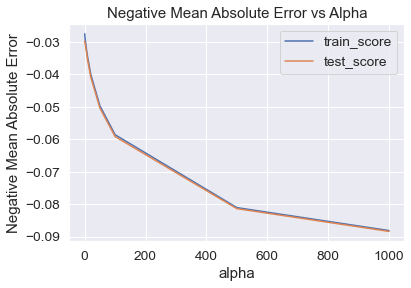

Best value of Alpha 0.3

r2 score for training data using ridge= 0.9096661816528037

r2 score for test using ridge = 0.886144119080014

                 Features  Coefficient
7               GrLivArea       0.3283
2             OverallQual       0.2540
13            MSZoning_FV       0.1543
15            MSZoning_RL       0.1436
5             TotalBsmtSF       0.1257
14            MSZoning_RH       0.1253
16            MSZoning_RM       0.1103
9              GarageArea       0.0917
10             GarageQual       0.0816
1                 LotArea       0.0772
4              BsmtFinSF1       0.0728
28           SaleType_New       0.0652
0             LotFrontage       0.0412
11             WoodDeckSF       0.0394
3             OverallCond       0.0391
17   Neighborhood_Crawfor       0.0361
18   Neighborhood_Veenker       0.0330
27        GarageType_None       0.0301
24           Heating_Wall       0.0299
19       Condition2_Feedr      -0.0302
6            LowQualFinSF      -0.0310
29  Sa

In [163]:
## I have used RFE and selected 30 Features out of 200. I tried different no of features as well like 50,20 and 15. R2 value does not change much
## I am going ahead with 30 as Lasso also helps in feature elimination.
rfe_sel_columns = rfe_feature_selection(30)

X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

ridge_model()


We can see that there is no overfitting as test accuracy is .89 and train accuracy is .91

<b> Trying out different values of lambda and checking r2 value<b>

In [164]:
def build_ridge_model(alpha):
    ridge = Ridge(alpha=alpha)
    print("----------alpha = " + str(i) +" --------------")
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_train)
    print("r2 score for train using ridge= " + str(r2_score(y_train, y_pred)))
    y_test_pred = ridge.predict(X_test)
    print("r2 score for test using ridge = " + str(r2_score(y_test, y_test_pred)))
alpha = [0.3, 0.6,0.9,5,10,20,40,50]
for i in alpha:
    build_ridge_model(i)

----------alpha = 0.3 --------------
r2 score for train using ridge= 0.9096661816528037
r2 score for test using ridge = 0.886144119080014
----------alpha = 0.6 --------------
r2 score for train using ridge= 0.9077803821075487
r2 score for test using ridge = 0.8882129215869748
----------alpha = 0.9 --------------
r2 score for train using ridge= 0.9056755098436605
r2 score for test using ridge = 0.8889686518107354
----------alpha = 5 --------------
r2 score for train using ridge= 0.883108489445901
r2 score for test using ridge = 0.8782766416665133
----------alpha = 10 --------------
r2 score for train using ridge= 0.8629817991170516
r2 score for test using ridge = 0.8604720374838424
----------alpha = 20 --------------
r2 score for train using ridge= 0.8283242902921534
r2 score for test using ridge = 0.8264551440686082
----------alpha = 40 --------------
r2 score for train using ridge= 0.7711977478709321
r2 score for test using ridge = 0.7687532363502154
----------alpha = 50 -------------

Model Evaluation

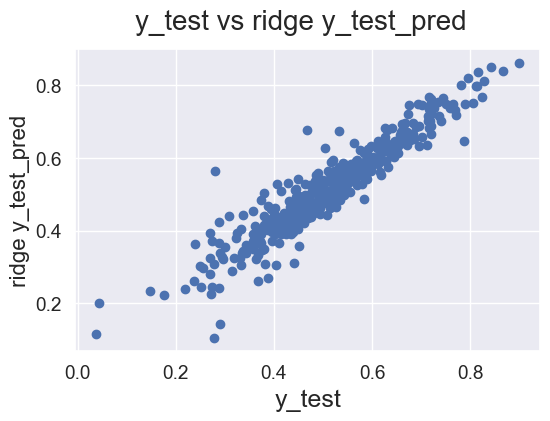

In [165]:
fig = plt.figure(dpi=100)
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs ridge y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge y_test_pred', fontsize=16)  
plt.show()

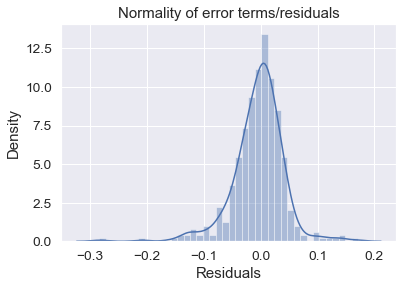

In [166]:
y_res=y_test-y_test_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

In [167]:
def lasso_model():
    # list of alphas
   
    params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

    lasso = Lasso()

    # cross validation
    folds = 5
    model_cv = GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1
                           )

    model_cv.fit(X_train, y_train)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")
    

    # Plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

    plt.xlabel('alpha')
    plt.ylabel("Negative Mean Absolute Error")

    plt.title("Negative Mean Absolute Error vs Alpha")
    plt.legend(['train_score', 'test_score'], loc='upper right')
    plt.show()
    
    alpha = model_cv.best_params_['alpha']
    
    print("Best value of Alpha" + str(alpha)+"\n")
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_train)
    print("r2 score for training data using Lasso= " + str(r2_score(y_train, y_pred))+"\n")
    
    y_test_pred = lasso.predict(X_test)
    print("r2 score for test using Lasso = " + str(r2_score(y_test, y_test_pred))+"\n")
    
    lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
    lasso_df.reset_index(drop=True, inplace=True)
    lasso_df = lasso_df[lasso_df.Coefficient != 0]
    lasso_df= lasso_df.sort_values(by='Coefficient', ascending=False)
    print(lasso_df.shape)
    
    print(lasso_df)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


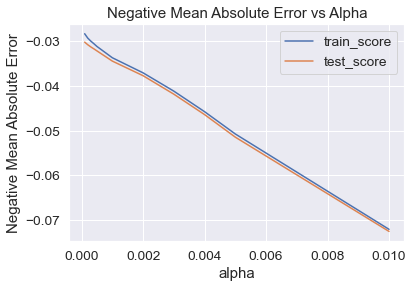

Best value of Alpha0.0001

r2 score for training data using Lasso= 0.9049175510693875

r2 score for test using Lasso = 0.8912215821082329

(28, 2)
                Features  Coefficient
7              GrLivArea       0.3276
2            OverallQual       0.2614
5            TotalBsmtSF       0.1194
13           MSZoning_FV       0.1102
15           MSZoning_RL       0.1026
9             GarageArea       0.0868
14           MSZoning_RH       0.0772
4             BsmtFinSF1       0.0753
16           MSZoning_RM       0.0655
1                LotArea       0.0639
10            GarageQual       0.0417
11            WoodDeckSF       0.0388
3            OverallCond       0.0376
0            LotFrontage       0.0364
17  Neighborhood_Crawfor       0.0321
28          SaleType_New       0.0248
18  Neighborhood_Veenker       0.0235
24          Heating_Wall       0.0015
19      Condition2_Feedr      -0.0057
23          Heating_OthW      -0.0099
6           LowQualFinSF      -0.0155
8           Kitch

In [168]:
 lasso_model()

We can see that there is no overfitting as test accuracy is 0.89

In [169]:
def build_lasso_model(alpha):
    lasso = Lasso(alpha=alpha)
    print("----------alpha = " + str(i) +" --------------")
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    print("r2 score for train using lasso= " + str(r2_score(y_train, y_pred)))
    y_test_pred = lasso.predict(X_test)
    print("r2 score for test using lasso = " + str(r2_score(y_test, y_test_pred)))
    
alpha = [0.0001, 0.001, 0.01]
for i in alpha:
    build_lasso_model(i)

----------alpha = 0.0001 --------------
r2 score for train using lasso= 0.9049175510693875
r2 score for test using lasso = 0.8912215821082329
----------alpha = 0.001 --------------
r2 score for train using lasso= 0.8561537387407707
r2 score for test using lasso = 0.870697031267625
----------alpha = 0.01 --------------
r2 score for train using lasso= 0.42446818767522065
r2 score for test using lasso = 0.3802857500366711


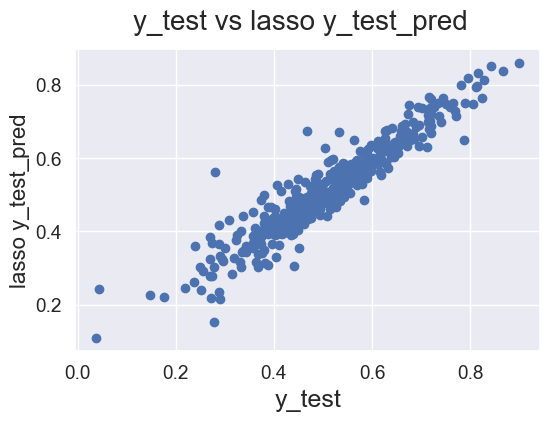

In [170]:
fig = plt.figure(dpi=100)
lasso = Lasso(alpha=.0001)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs lasso y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso y_test_pred', fontsize=16)  
plt.show()

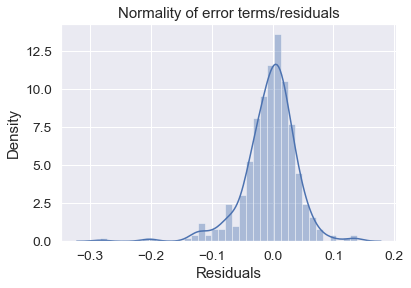

In [171]:
y_res=y_test-y_test_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<b>Doubling alpha value for Lasso<b>

In [172]:
alpha = 0.0001*2

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [173]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)

lasso_df = lasso_df[lasso_df.Coefficient != 0]
lasso_df.sort_values(by='Coefficient', ascending=False)


,Features,Coefficient
7,GrLivArea,0.3170
2,OverallQual,0.2691
5,TotalBsmtSF,0.1139
9,GarageArea,0.0865
4,BsmtFinSF1,0.0755
1,LotArea,0.0498
13,MSZoning_FV,0.0436
10,GarageQual,0.0429
15,MSZoning_RL,0.0400
11,WoodDeckSF,0.0386


<b>Excluding 5 important predictor variables in Lasso with alpha 0.001<b>

In [174]:
X_train_lasso = X_train.drop(['GrLivArea','OverallQual','TotalBsmtSF','MSZoning_FV','MSZoning_RL'],axis = 1)


In [175]:
lasso = Lasso()
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
              1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
    }
# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

model_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [176]:
model_cv.best_params_

{'alpha': 0.0001}

In [177]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [178]:
lasso_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)

lasso_df = lasso_df[lasso_df.Coefficient != 0]
lasso_df.sort_values(by='Coefficient', ascending=False)

,Features,Coefficient
6,GarageArea,0.2827
1,LotArea,0.1957
0,LotFrontage,0.1132
3,BsmtFinSF1,0.0970
12,Neighborhood_Crawfor,0.0823
8,WoodDeckSF,0.0805
4,LowQualFinSF,0.0638
13,Neighborhood_Veenker,0.0394
23,SaleType_New,0.0363
7,GarageQual,0.0352


<b>Doubling alpha value for Ridge<b>

In [179]:
alpha = 0.3*2

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.6)

In [180]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient', ascending=False)

,Features,Coefficient
7,GrLivArea,0.3183
2,OverallQual,0.2540
13,MSZoning_FV,0.1347
15,MSZoning_RL,0.1249
5,TotalBsmtSF,0.1235
14,MSZoning_RH,0.1046
9,GarageArea,0.0923
16,MSZoning_RM,0.0909
1,LotArea,0.0745
10,GarageQual,0.0737
